<a href="https://colab.research.google.com/github/Naveenkondisetty/ML-Lab-/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  # For plotting loss


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # Import load_iris

# Load the iris dataset
iris = load_iris() # Call load_iris() and assign it to iris
X = iris.data # Access data using iris.data
# Convert to pandas DataFrame
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = iris.target

# 1. Basic Information
print(iris_df.head())
print("\nData description:")
print(iris_df.describe())

# 2. Checking for missing values
print("\nMissing values:\n", iris_df.isnull().sum())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Data description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000  

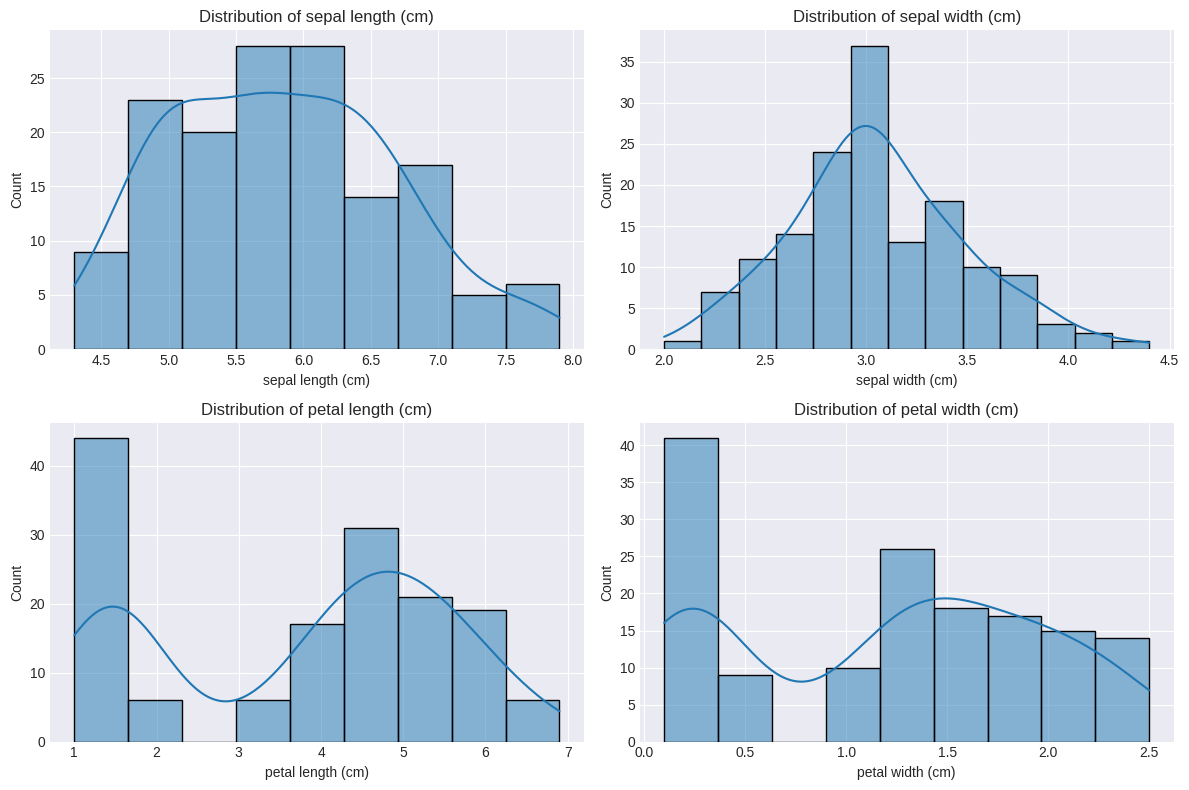

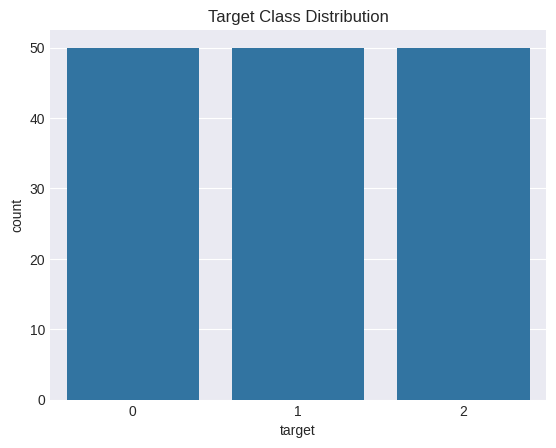

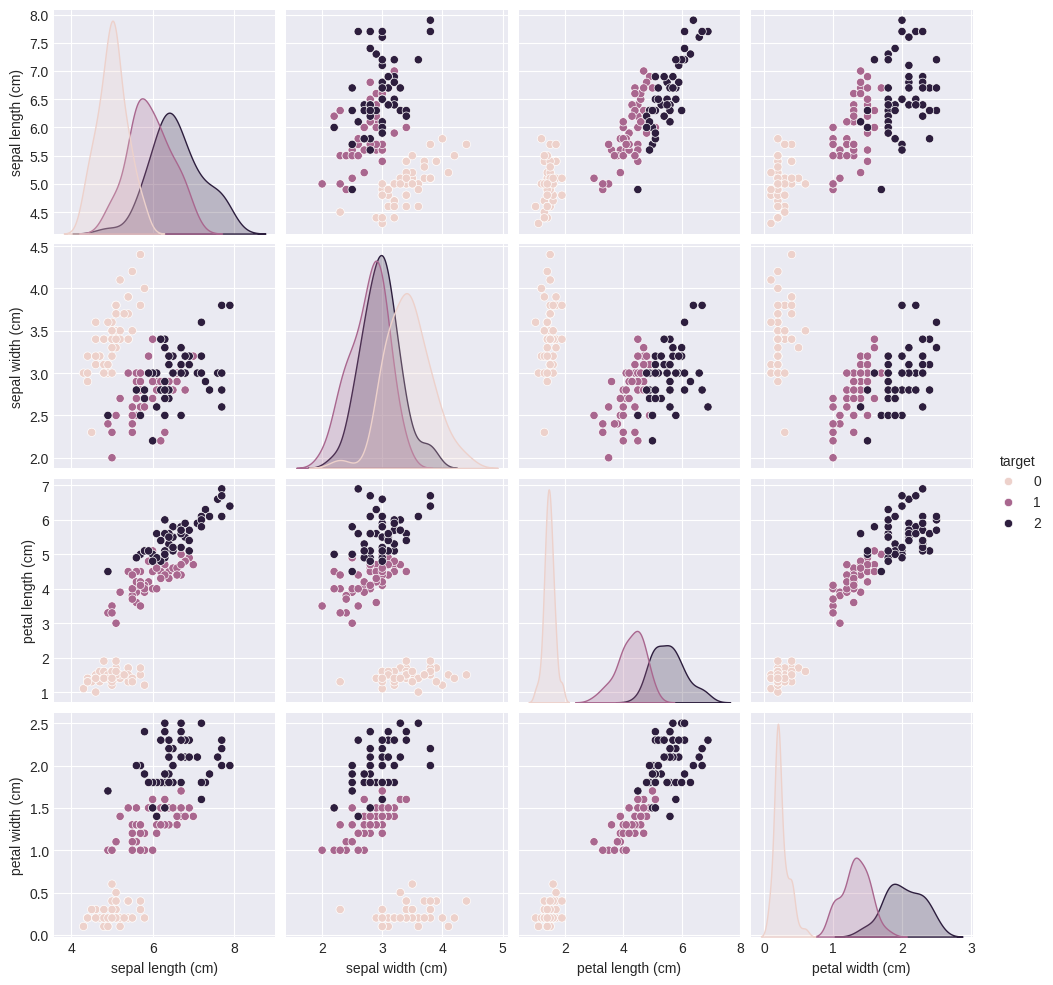

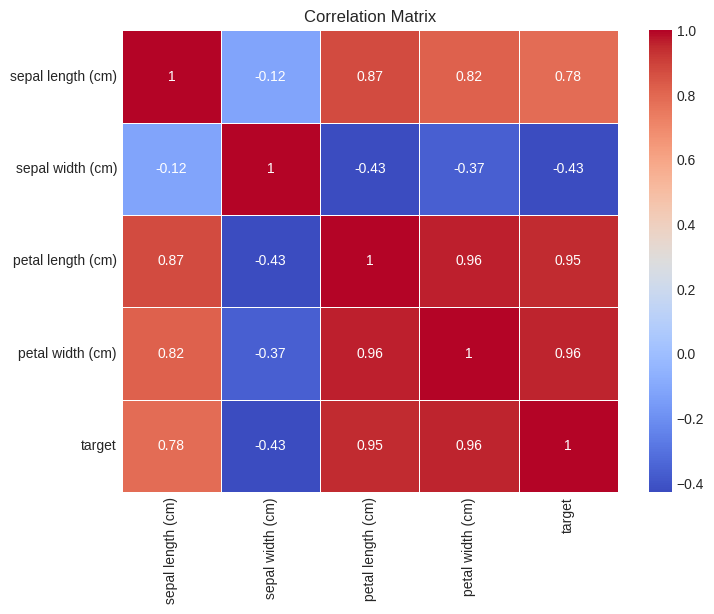

In [57]:
# 3. Distribution of features
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(iris_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# 4. Class Distribution
sns.countplot(x=iris_df['target'])
plt.title('Target Class Distribution')
plt.show()

# 5. Pair Plot
sns.pairplot(iris_df, hue='target')
plt.show()

# 6. Correlation Matrix and Heatmap
corr_matrix = iris_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [58]:
# Load dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels

# One-hot encode the target (for multi-class classification)
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)


In [59]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)


In [60]:
# Define the architecture
input_size = X_train.shape[1]  # Number of input features (4)
hidden_size = 10  # Number of neurons in the hidden layer
output_size = y_train.shape[1]  # Number of output classes (3)

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Learning rate
lr = 0.01


In [61]:
# Sigmoid activation and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

# Softmax activation for output layer (multiclass classification)
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [62]:
# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [63]:
# Backward propagation (gradient calculation)
def backward_propagation(X, y, Z1, A1, A2, W1, W2, b1, b2):
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    return W1, b1, W2, b2


In [64]:
# Train the network
epochs = 1000
losses = []  # Store loss for plotting

for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)

    # Cross-entropy loss
    loss = -np.mean(np.sum(y_train * np.log(A2), axis=1))
    losses.append(loss)  # Append loss for plotting

    # Backpropagation
    W1, b1, W2, b2 = backward_propagation(X_train, y_train, Z1, A1, A2, W1, W2, b1, b2)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')


Epoch 0, Loss: 1.797596545423663
Epoch 100, Loss: 0.4956676204160852
Epoch 200, Loss: 0.7095224545016205
Epoch 300, Loss: 0.6388003161662158
Epoch 400, Loss: 0.6606671314439246
Epoch 500, Loss: 0.3830980183192292
Epoch 600, Loss: 0.14288668865136575
Epoch 700, Loss: 0.12246773733487991
Epoch 800, Loss: 0.11235929054974245
Epoch 900, Loss: 0.1047483172492302


In [65]:
# Test the network
_, _, _, A2_test = forward_propagation(X_test, W1, b1, W2, b2)
predictions = np.argmax(A2_test, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, predictions)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')


Accuracy on test set: 93.33%


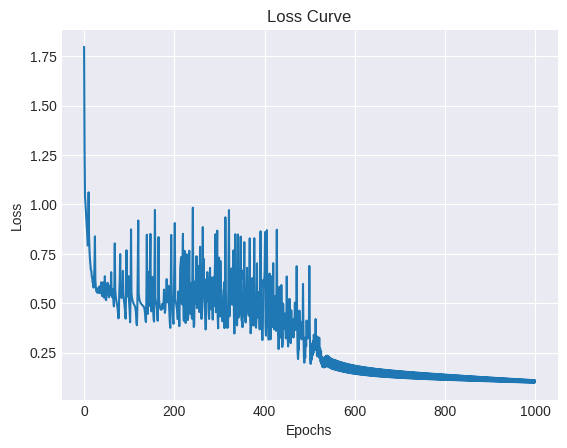

In [66]:
# Plot the loss curve
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()